<a href="https://colab.research.google.com/github/texhz/covid_19_framework/blob/main/covid_19_framework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [3]:
!git clone "https://github.com/texhz/covid_19_framework.git"
%cd covid_19_framework

Cloning into 'covid_19_framework'...
remote: Enumerating objects: 62, done.
remote: Counting objects: 100% (62/62), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 62 (delta 19), reused 51 (delta 13), pack-reused 0
Unpacking objects: 100% (62/62), done.
/content/covid_19_framework


In [28]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler , Normalizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import norm
from scipy import stats
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

# Covid 19 Detection Framework

In [29]:
covid_data_1 = pd.read_csv(r"data/Cleaned-Data.csv")

pd.pandas.set_option('display.max_columns',None)

# Visualization

## Full Data

In [30]:
display("Peeking into Data", covid_data_1)

'Peeking into Data'

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Severity_Mild,Severity_Moderate,Severity_None,Severity_Severe,Contact_Dont-Know,Contact_No,Contact_Yes,Country,Covid
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,China,1
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,China,1
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,1,0,0,China,1
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,China,1
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,China,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,Other,1
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,1,0,0,Other,1
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,Other,1
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,Other,1


In [31]:
display("Shape of dataset")
print("Rows:",covid_data_1.shape[0],"\nColumns:",covid_data_1.shape[1])

'Shape of dataset'

Rows: 316800 
Columns: 28


## Data Distribution

In [32]:
severity_columns = covid_data_1.filter(like='Severity_').columns

In [33]:
covid_data_1['Severity_None'].replace({1:'None',0:'No'},inplace =True)
covid_data_1['Severity_Mild'].replace({1:'Mild',0:'No'},inplace =True)
covid_data_1['Severity_Moderate'].replace({1:'Moderate',0:'No'},inplace =True)
covid_data_1['Severity_Severe'].replace({1:'Severe',0:'No'},inplace =True)

In [34]:
covid_data_1['Covid']=covid_data_1[severity_columns].values.tolist()

In [35]:
def removing(list1):
    list1 = set(list1) 
    list1.discard("No")
    a = ''.join(list1)
    return a

In [36]:
covid_data_1['Covid'] = covid_data_1['Covid'].apply(removing)

## Grouping

In [37]:
age_columns = covid_data_1.filter(like='Age_').columns
gender_columns = covid_data_1.filter(like='Gender_').columns
contact_columns = covid_data_1.filter(like='Contact_').columns

In [38]:
No_risk_age = covid_data_1.groupby(['Severity_None'])[age_columns].sum()
No_risk_gender = covid_data_1.groupby(['Severity_None'])[gender_columns].sum()
No_risk_contact = covid_data_1.groupby(['Severity_None'])[contact_columns].sum()

In [39]:
Low_risk_age = covid_data_1.groupby(['Severity_Mild'])[age_columns].sum()
Low_risk_gender = covid_data_1.groupby(['Severity_Mild'])[gender_columns].sum()
Low_risk_contact = covid_data_1.groupby(['Severity_Mild'])[contact_columns].sum()

In [40]:
Moderate_risk_age = covid_data_1.groupby(['Severity_Moderate'])[age_columns].sum()
Moderate_risk_gender = covid_data_1.groupby(['Severity_Moderate'])[gender_columns].sum()
Moderate_risk_contact = covid_data_1.groupby(['Severity_Moderate'])[contact_columns].sum()

In [41]:
Severe_risk_age = covid_data_1.groupby(['Severity_Severe'])[age_columns].sum()
Severe_risk_gender = covid_data_1.groupby(['Severity_Severe'])[gender_columns].sum()
Severe_risk_contact = covid_data_1.groupby(['Severity_Severe'])[contact_columns].sum()

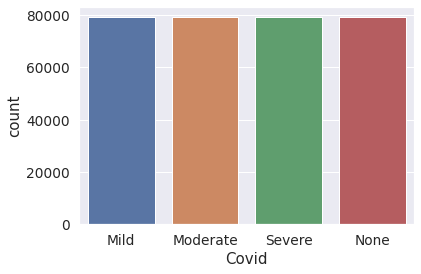

In [42]:
sns.countplot(covid_data_1['Covid'])

# Variable management

In [43]:
covid_data_1.drop("Country",axis=1,inplace=True)

In [44]:
covid_data_1.drop(severity_columns,axis=1,inplace=True)

In [45]:
covid_data_1['Symptoms_Score'] = covid_data_1.iloc[:,:5].sum(axis=1) + covid_data_1.iloc[:,6:10].sum(axis=1)

In [46]:
covid_data_1.shape

(316800, 24)

In [47]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
covid_data_1['Covid'] = le.fit_transform(covid_data_1['Covid'])

In [48]:
covid_data_1

,Fever,Tiredness,Dry-Cough,Difficulty-in-Breathing,Sore-Throat,None_Sympton,Pains,Nasal-Congestion,Runny-Nose,Diarrhea,None_Experiencing,Age_0-9,Age_10-19,Age_20-24,Age_25-59,Age_60+,Gender_Female,Gender_Male,Gender_Transgender,Contact_Dont-Know,Contact_No,Contact_Yes,Covid,Symptoms_Score
0,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,0,9
1,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,0,9
2,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,1,0,0,0,9
3,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,0,1,1,9
4,1,1,1,1,1,0,1,1,1,1,0,1,0,0,0,0,0,1,0,0,1,0,1,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316795,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,3,0
316796,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,1,0,0,3,0
316797,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,2,0
316798,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,2,0


# Feature Selection

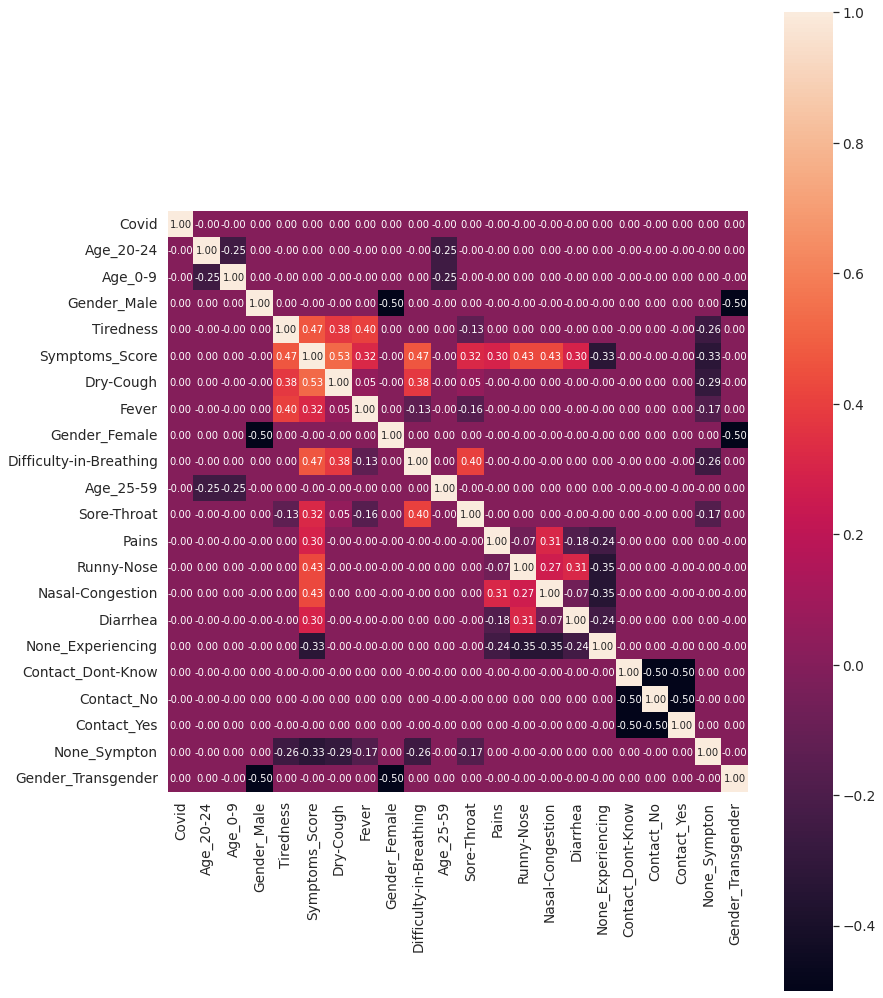

In [49]:
from pylab import rcParams
rcParams['figure.figsize'] = 13, 18
corrmat = covid_data_1.corr()
k = 22
cols = corrmat.nlargest(k, 'Covid')['Covid'].index
cm = np.corrcoef(covid_data_1[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

# Model

In [50]:
X= covid_data_1.drop(['Covid'],axis=1)
y= covid_data_1['Covid']

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

- Random Forest

In [ ]:
'''from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'n_estimators': [100, 200, 300, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)'''

In [ ]:
'''# Fit the grid search to the data
grid_search.fit(X_train, y_train)'''

In [ ]:
'''print('Best Parameters',grid_search.best_params_)
best_grid = grid_search.best_estimator_
print('\n Best Estimator',best_grid)'''

In [ ]:
"""Best Parameters {'criterion': 'gini', 'max_depth': 4, 'max_features': 'sqrt', 'n_estimators': 100}
Best Estimator RandomForestClassifier(max_depth=4, max_features='sqrt')"""

In [52]:
from sklearn.ensemble import RandomForestClassifier
rfc1=RandomForestClassifier(criterion= 'gini', max_depth= 4, max_features= 'sqrt', n_estimators= 100)

In [53]:
rfc1.fit(X_train, y_train)

RandomForestClassifier(max_depth=4, max_features='sqrt')

In [54]:
pred=rfc1.predict(X_test)

In [55]:
pred

array([3, 3, 2, ..., 3, 3, 1])

In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test,pred))

Accuracy for Random Forest on CV data:  0.23028724747474746


In [57]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,pred)

array([[1705, 1662, 5929, 6679],
       [1945, 1458, 5984, 6522],
       [1937, 1715, 5454, 6651],
       [1972, 1697, 6076, 5974]])

- Gradient Boosting  on Decision trees


In [58]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 95 kB/s 


In [59]:
from catboost import CatBoostClassifier

In [60]:
model = CatBoostClassifier(iterations=200)

In [61]:
categorical_var = np.where(X_train.dtypes != np.float)[0]
print('\nCategorical Variables indices : ',categorical_var)


Categorical Variables indices :  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22]


In [62]:
model.fit(X_train,y_train,cat_features = categorical_var,plot=False)

Learning rate set to 0.408837
0:	learn: 1.3862142	total: 633ms	remaining: 2m 5s
1:	learn: 1.3861638	total: 1s	remaining: 1m 39s
2:	learn: 1.3861440	total: 1.41s	remaining: 1m 32s
3:	learn: 1.3861000	total: 1.83s	remaining: 1m 29s
4:	learn: 1.3860046	total: 2.23s	remaining: 1m 27s
5:	learn: 1.3859796	total: 2.61s	remaining: 1m 24s
6:	learn: 1.3859552	total: 2.97s	remaining: 1m 22s
7:	learn: 1.3859276	total: 3.37s	remaining: 1m 20s
8:	learn: 1.3858819	total: 3.8s	remaining: 1m 20s
9:	learn: 1.3858448	total: 4.28s	remaining: 1m 21s
10:	learn: 1.3857902	total: 4.7s	remaining: 1m 20s
11:	learn: 1.3857512	total: 5.09s	remaining: 1m 19s
12:	learn: 1.3857010	total: 5.49s	remaining: 1m 18s
13:	learn: 1.3856820	total: 5.88s	remaining: 1m 18s
14:	learn: 1.3856065	total: 6.36s	remaining: 1m 18s
15:	learn: 1.3855559	total: 6.83s	remaining: 1m 18s
16:	learn: 1.3855393	total: 7.24s	remaining: 1m 17s
17:	learn: 1.3855137	total: 7.66s	remaining: 1m 17s
18:	learn: 1.3855013	total: 8.02s	remaining: 1m 16

In [63]:
predict_train = model.predict(X_train)
print('\nTarget on train data',predict_train)


Target on train data [[3]
 [3]
 [3]
 ...
 [3]
 [3]
 [3]]


In [64]:
accuracy_train = accuracy_score(y_train,predict_train)
print('\naccuracy_score on train dataset : ', accuracy_train)


accuracy_score on train dataset :  0.26465041035353537


In [65]:
predict_test = model.predict(X_test)
print('\nTarget on test data',predict_test) 

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('\naccuracy_score on test dataset : ', accuracy_test)


Target on test data [[3]
 [3]
 [3]
 ...
 [1]
 [3]
 [3]]

accuracy_score on test dataset :  0.19139835858585857


- Logistic Regression

In [66]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)

LogisticRegression()

In [67]:
# use the model to make predictions with the test data
y_pred = model.predict(X_test)

In [68]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.2401199494949495

In [ ]:
'''from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=23)
knn.fit(X_train, y_train)'''

In [ ]:
'''y_pred_knn = knn.predict(X_test)'''

In [ ]:
'''from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_knn)'''

In [ ]:
'''from sklearn.svm import SVC

svm = SVC(kernel='linear',C=0.025, random_state=101)

svm.fit(X_train, y_train)'''

In [ ]:
'''y_pred_svc = svc.predict(X_test)'''

In [ ]:
'''from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_svc)'''

In [69]:
from sklearn.naive_bayes import MultinomialNB

mb = MultinomialNB()

mb.fit(X_train, y_train)

MultinomialNB()

In [70]:
y_pred_mb = mb.predict(X_test)

In [71]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_mb)

0.24141414141414141

- Neural network

In [72]:
from keras.utils.np_utils import to_categorical
y_train = to_categorical(y_train, num_classes = 4)
y_train.shape

(253440, 4)

In [73]:
from keras.layers import Input,InputLayer, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import AveragePooling2D, MaxPooling2D, Dropout
from keras.models import Sequential,Model
from keras.optimizers import SGD
from keras.callbacks import ModelCheckpoint,LearningRateScheduler
import keras
from keras import backend as K

In [74]:
model=keras.models.Sequential()
#model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dense(4,activation='softmax'))

In [75]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])
                   
model.fit(X_train, y_train,epochs=10, batch_size=32, verbose=1)

Epoch 1/10
7920/7920 [==============================] - 30s 4ms/step - loss: 1.3865 - accuracy: 0.2492
Epoch 2/10
7920/7920 [==============================] - 25s 3ms/step - loss: 1.3864 - accuracy: 0.2489
Epoch 3/10
7920/7920 [==============================] - 25s 3ms/step - loss: 1.3864 - accuracy: 0.2514
Epoch 4/10
7920/7920 [==============================] - 24s 3ms/step - loss: 1.3864 - accuracy: 0.2513
Epoch 5/10
7920/7920 [==============================] - 24s 3ms/step - loss: 1.3864 - accuracy: 0.2505
Epoch 6/10
7920/7920 [==============================] - 24s 3ms/step - loss: 1.3864 - accuracy: 0.2500
Epoch 7/10
7920/7920 [==============================] - 25s 3ms/step - loss: 1.3864 - accuracy: 0.2485
Epoch 8/10
7920/7920 [==============================] - 24s 3ms/step - loss: 1.3864 - accuracy: 0.2495
Epoch 9/10
7920/7920 [==============================] - 24s 3ms/step - loss: 1.3864 - accuracy: 0.2490
Epoch 10/10
7920/7920 [==============================] - 24s 3ms/step - l

In [76]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred,axis=1)

1980/1980 [==============================] - 3s 1ms/step


In [77]:
y_pred

array([1, 1, 1, ..., 1, 1, 1])

In [78]:
!git add .

In [81]:
!git commit -m "Data Trainings"

[main 5170d81] Data Trainings
 4 files changed, 606 insertions(+)
 create mode 100644 catboost_info/catboost_training.json
 create mode 100644 catboost_info/learn/events.out.tfevents
 create mode 100644 catboost_info/learn_error.tsv
 create mode 100644 catboost_info/time_left.tsv


In [82]:
!git push -u origin main

fatal: could not read Username for 'https://github.com': No such device or address
